# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

# For Data Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# For Model Training and Evaluation

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# For Evaluation Metrics

In [8]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, 
    roc_curve, auc
)

# Load Dataset

In [10]:
data = pd.read_csv("DDos.csv")

# Data Pre-processing

# Clean column names by removing leading/trailing spaces

In [13]:
data.columns = data.columns.str.strip()

# Verify target classes

In [15]:
print("Unique values in 'Label' column:", data['Label'].unique())

Unique values in 'Label' column: ['BENIGN' 'DDoS' nan]


# Checking for missing values across columns

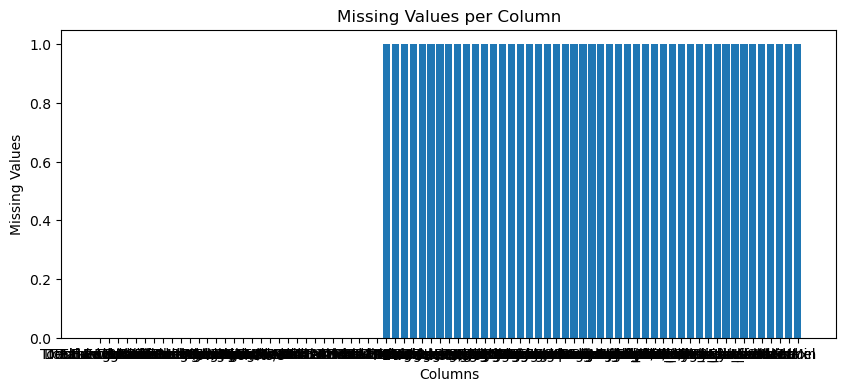

In [17]:
plt.figure(figsize=(10, 4))
plt.bar(data.columns, data.isna().sum())
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()


# Dropping rows with missing values for clean dataset

In [19]:
clean_data = data.dropna()

# Check data types and handle non-numeric

In [21]:
print("Data types:\n", clean_data.dtypes)
clean_data['Label'] = clean_data['Label'].map({'BENIGN': 0, 'DDoS': 1})

Data types:
 Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Label                           object
Length: 79, dtype: object


C:\Users\gandh\AppData\Local\Temp\ipykernel_9380\2661400262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Label'] = clean_data['Label'].map({'BENIGN': 0, 'DDoS': 1})


# Check label distribution after mapping

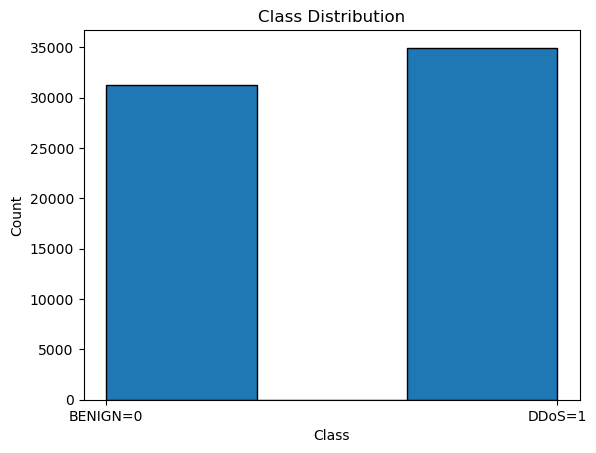

In [23]:
plt.hist(clean_data['Label'], bins=3, edgecolor='black')
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Data Exploring

# Display statistical summary

In [26]:
print(clean_data.describe())

       Destination Port  Flow Duration  Total Fwd Packets  \
count      66236.000000   6.623600e+04       66236.000000   
mean        6454.701794   1.388757e+07           5.180295   
std        16711.002247   2.815859e+07          16.873784   
min            0.000000   0.000000e+00           1.000000   
25%           80.000000   4.995450e+04           2.000000   
50%           80.000000   9.949430e+05           3.000000   
75%           80.000000   7.640073e+06           5.000000   
max        61538.000000   1.199983e+08        1681.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            66236.000000                 66236.000000   
mean                 5.119225                   695.632677   
std                 23.797303                  3230.070242   
min                  0.000000                     0.000000   
25%                  1.000000                    26.000000   
50%                  4.000000                    30.000000   
75%             

# Plot each feature distribution

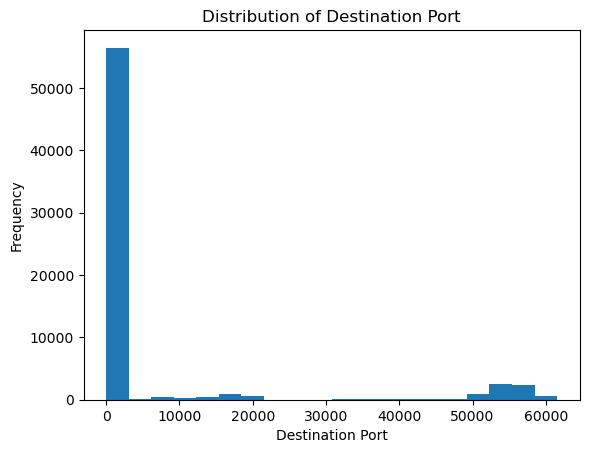

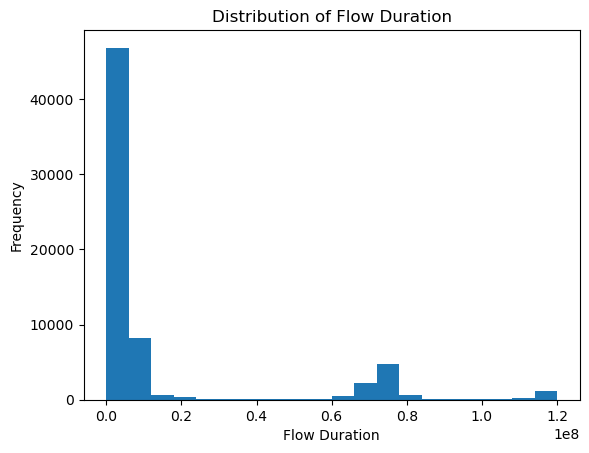

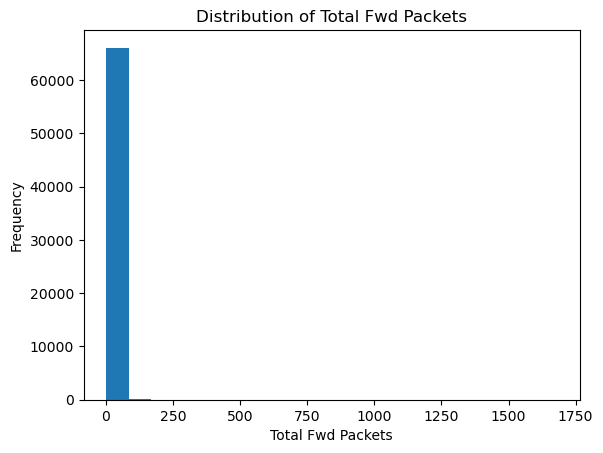

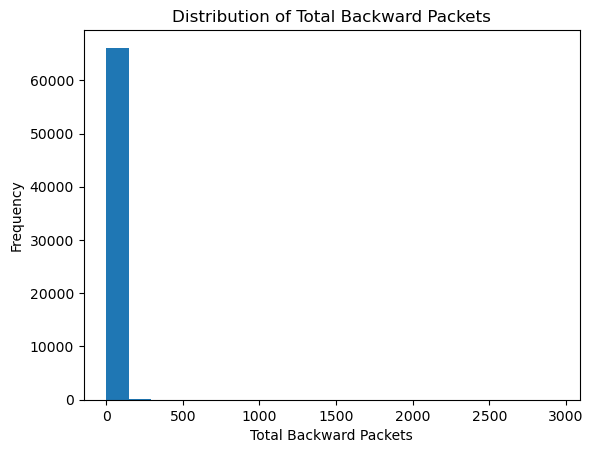

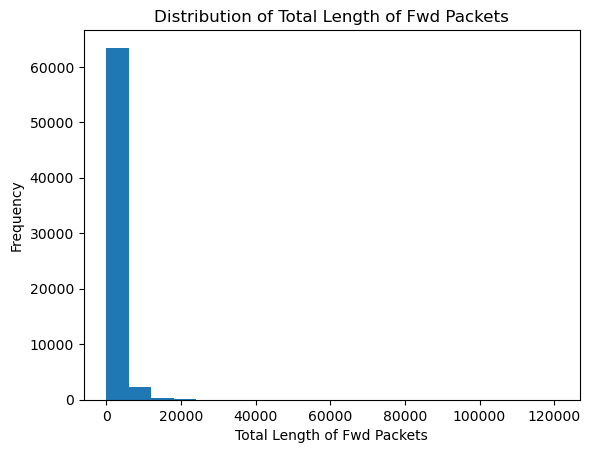

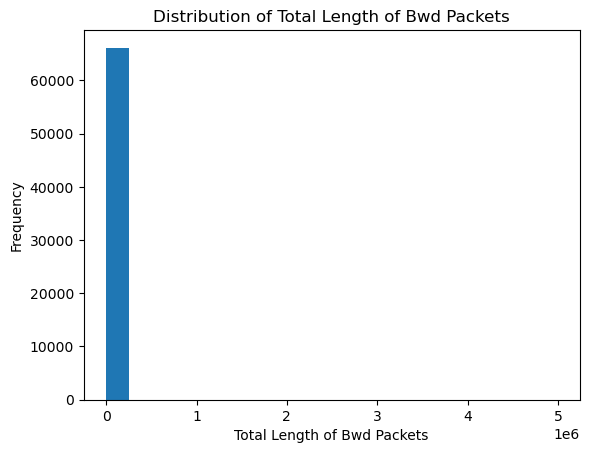

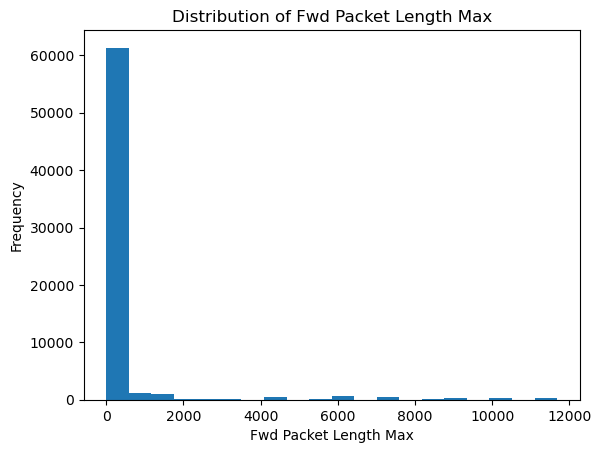

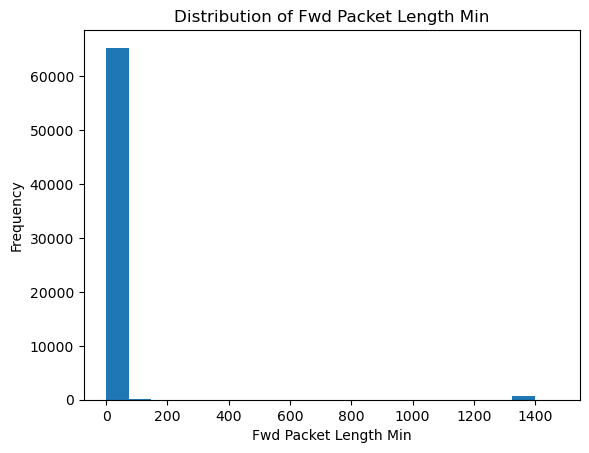

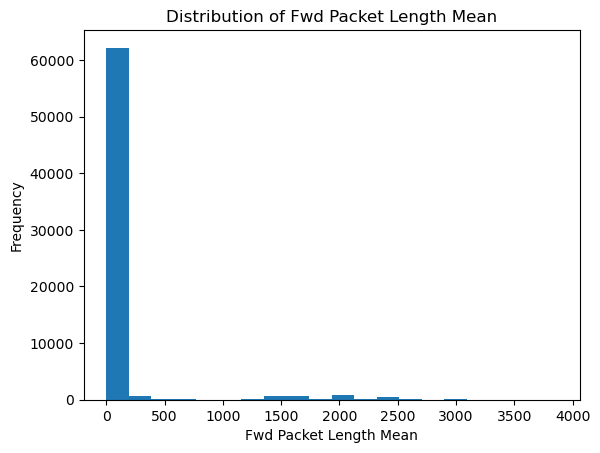

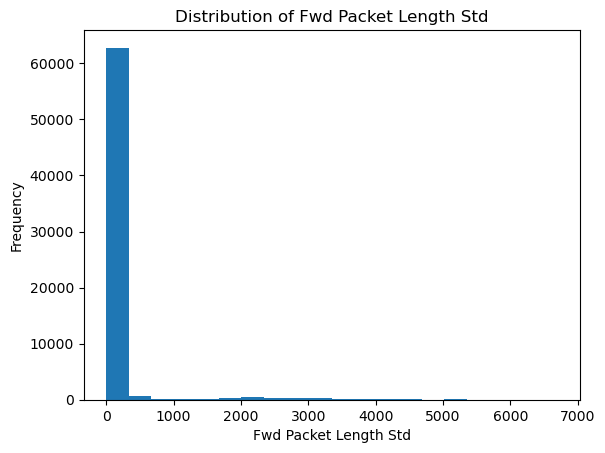

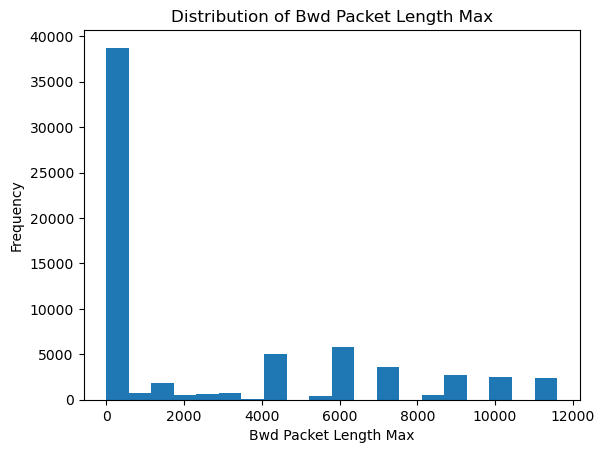

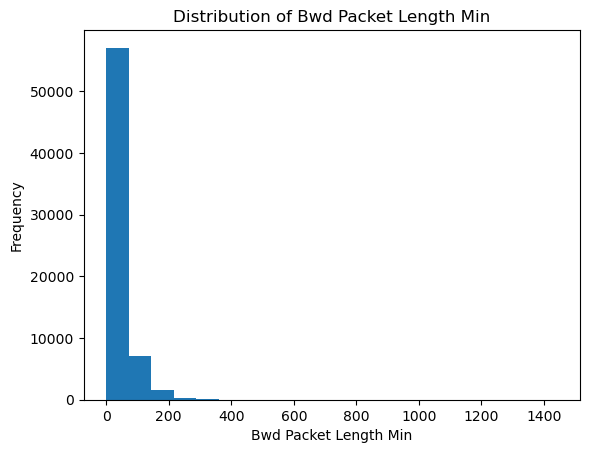

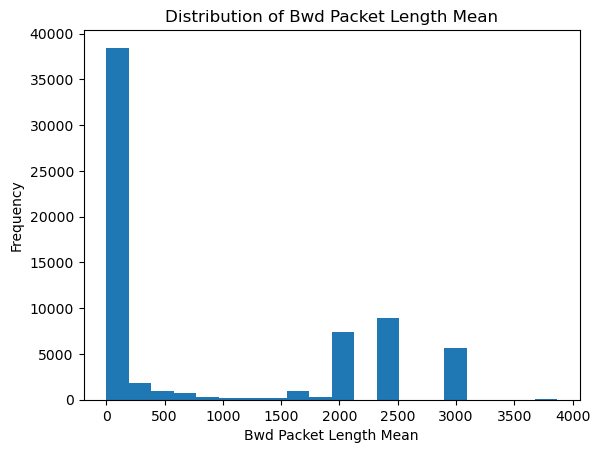

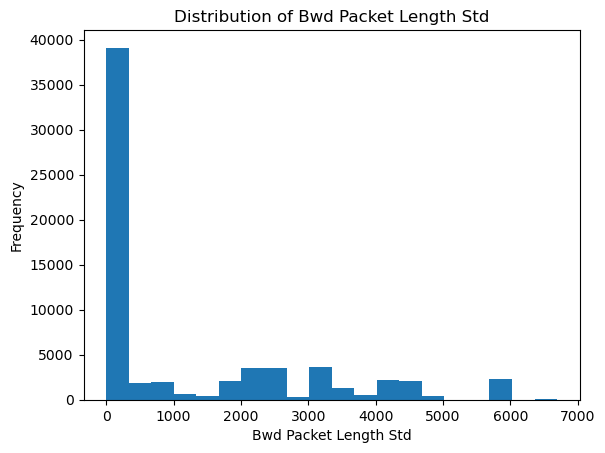

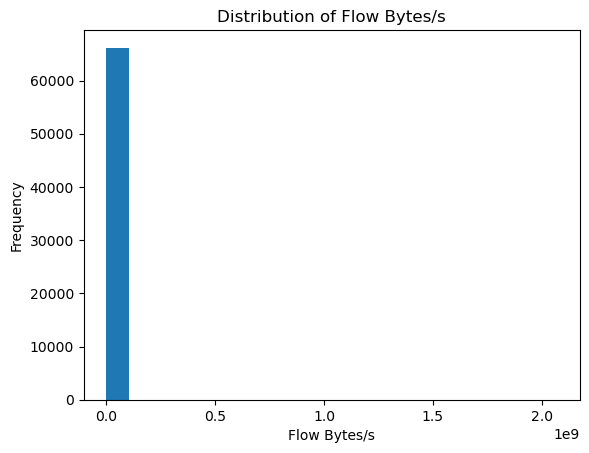

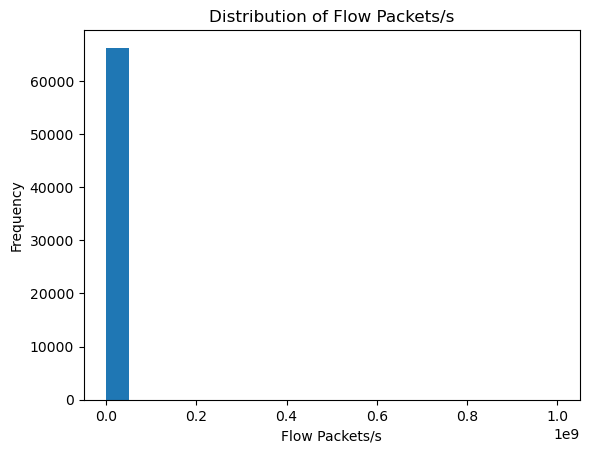

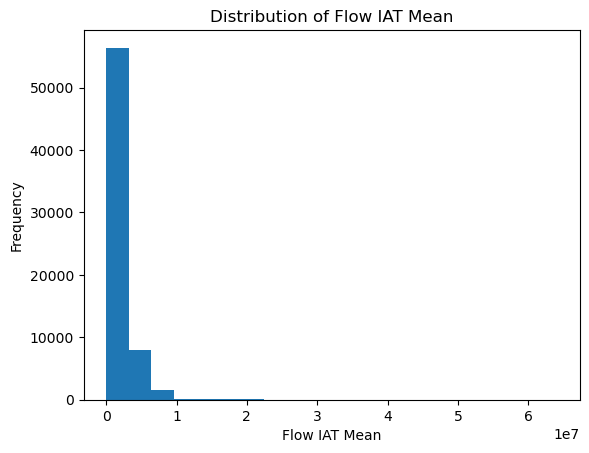

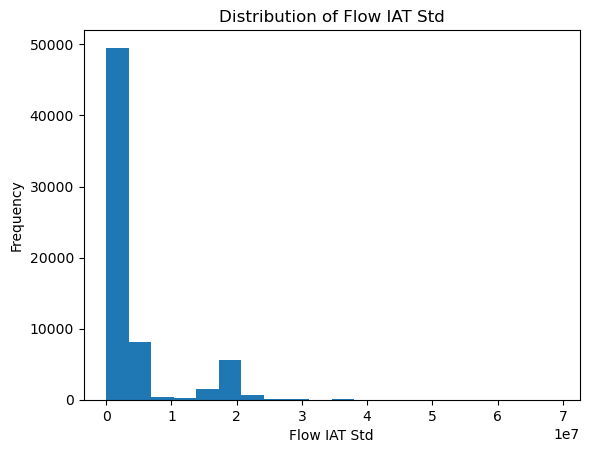

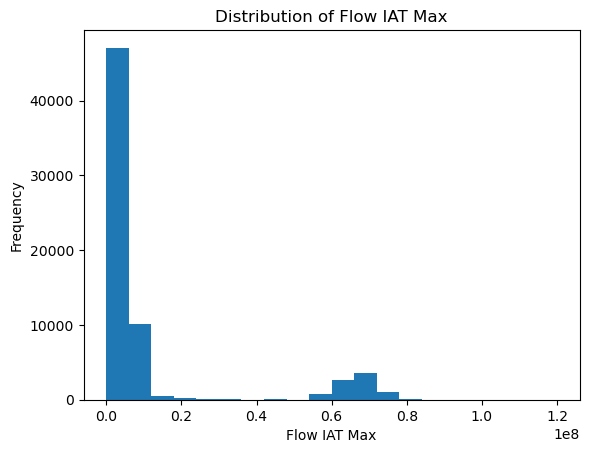

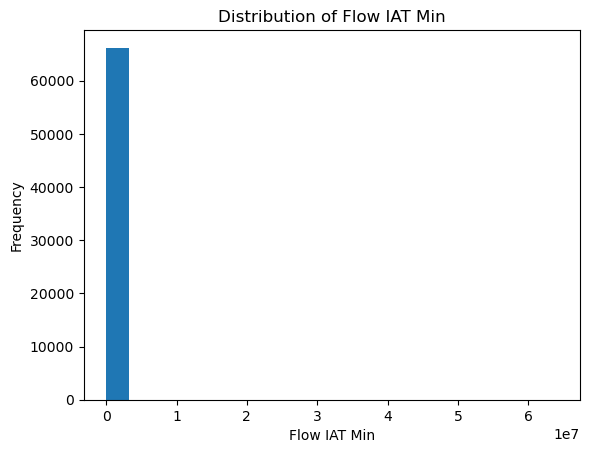

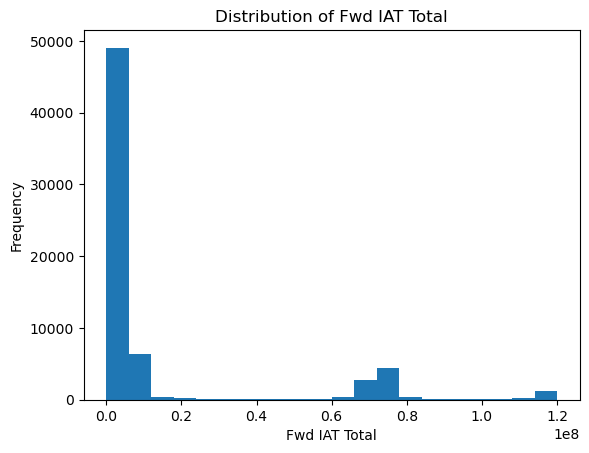

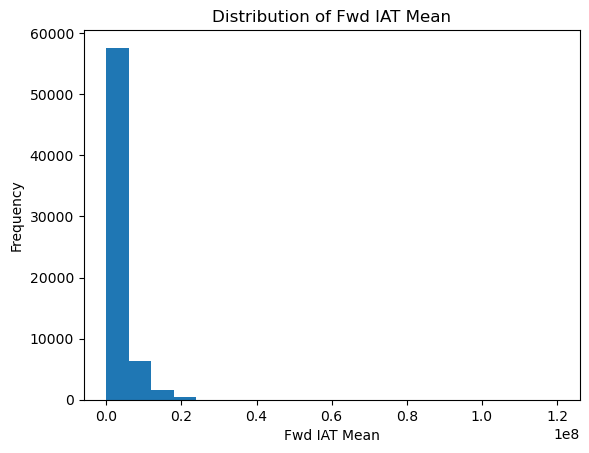

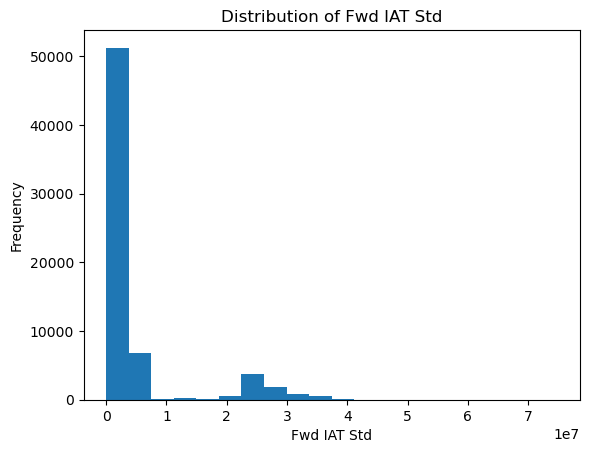

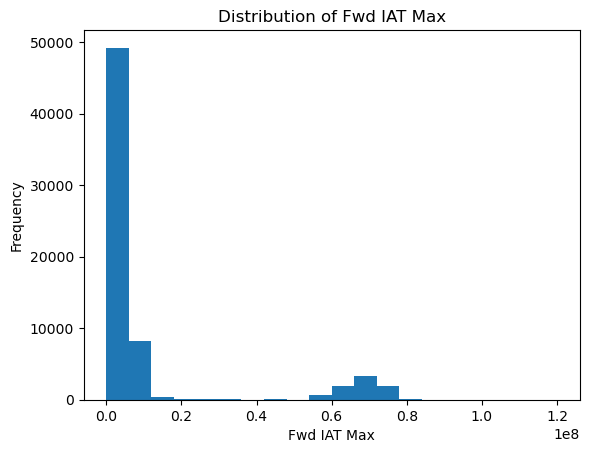

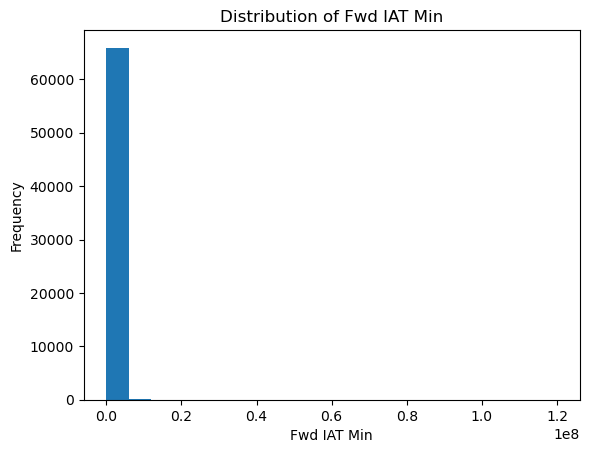

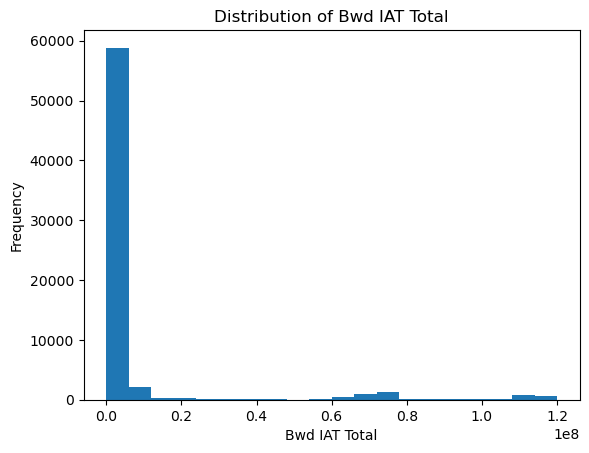

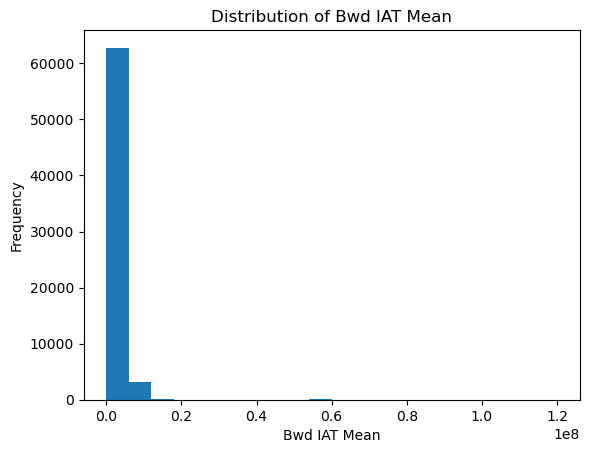

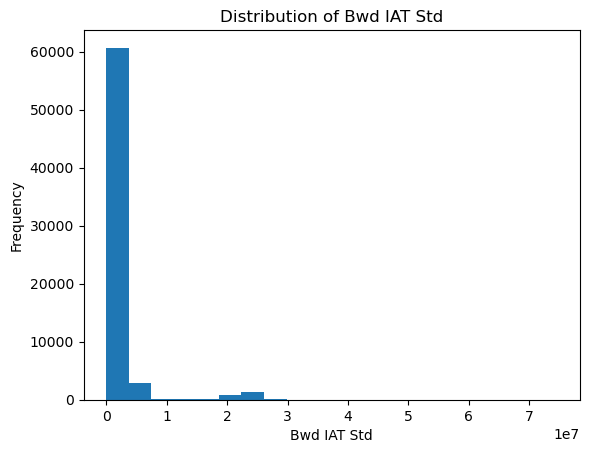

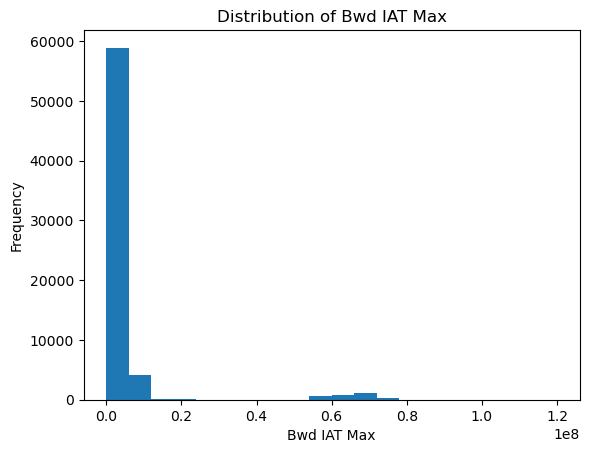

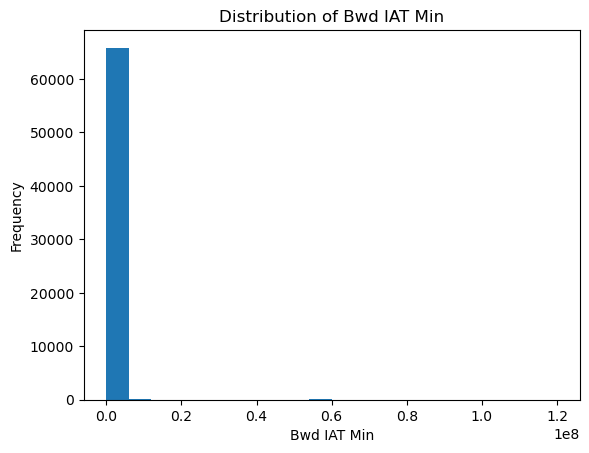

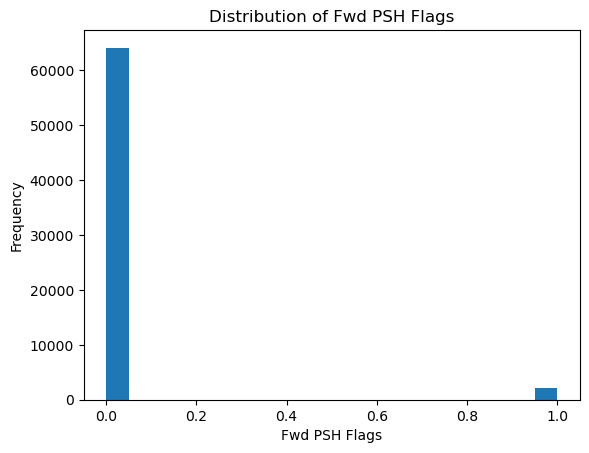

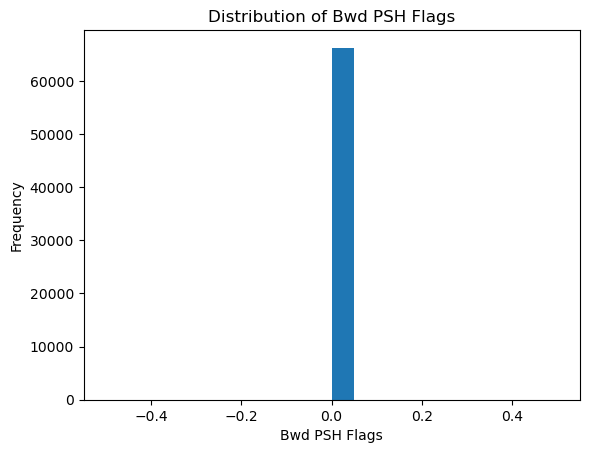

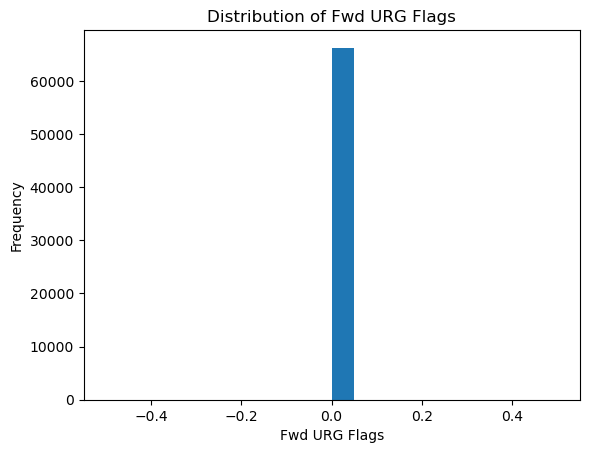

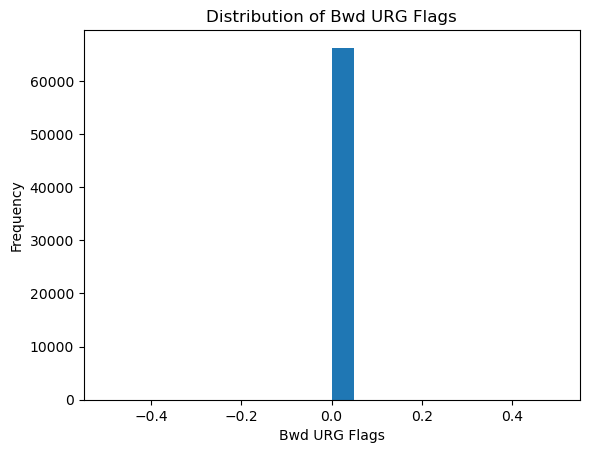

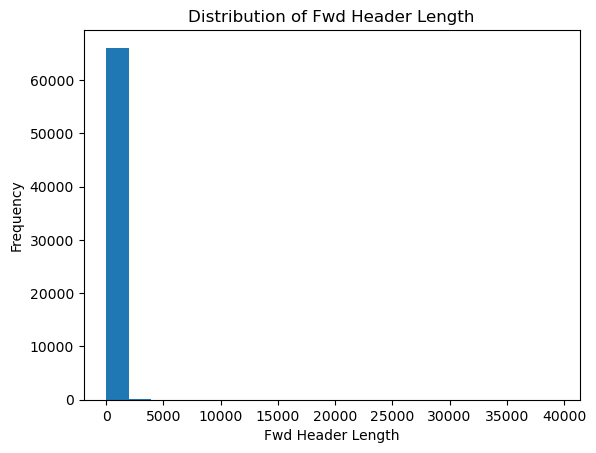

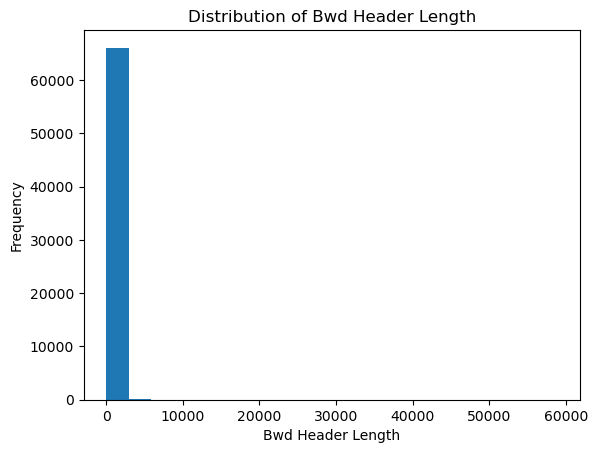

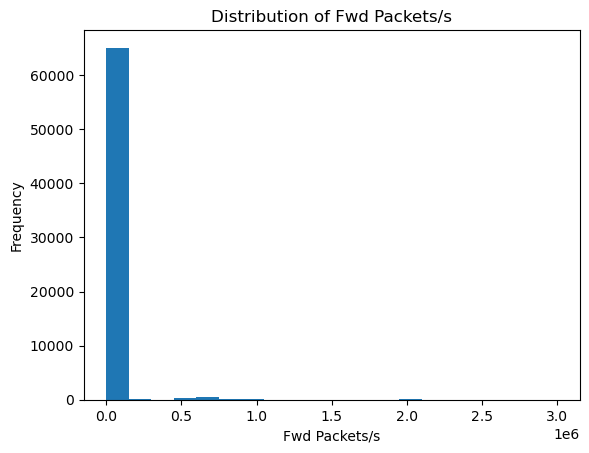

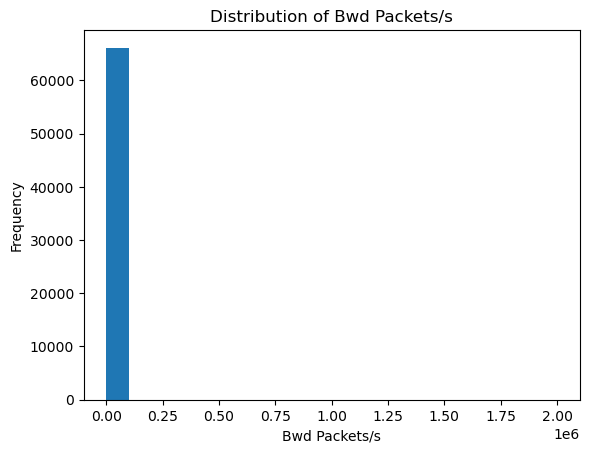

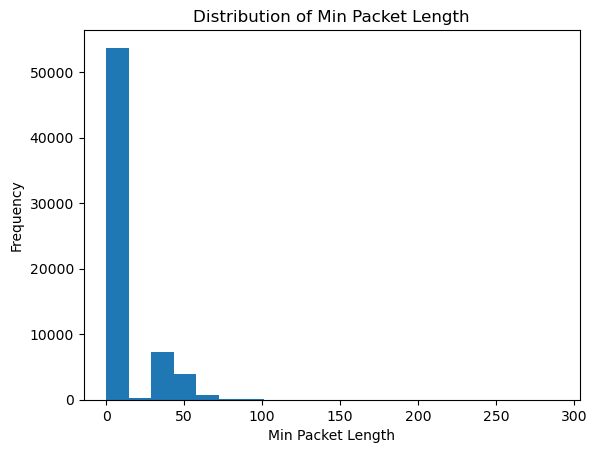

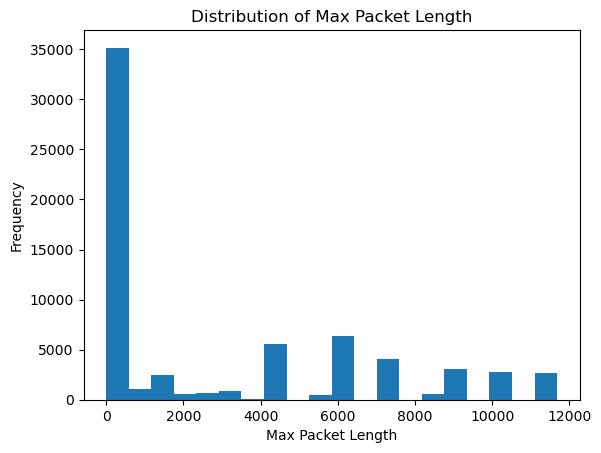

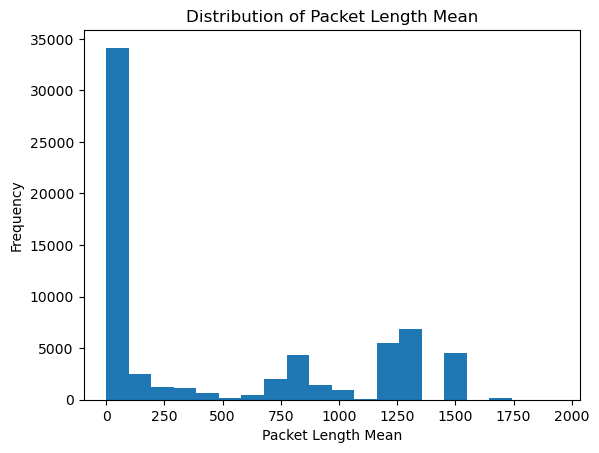

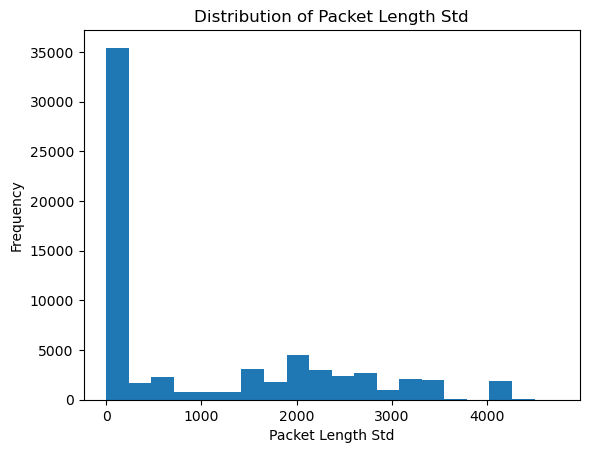

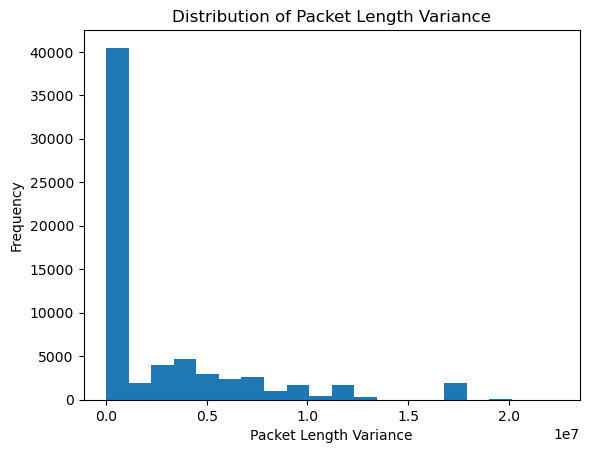

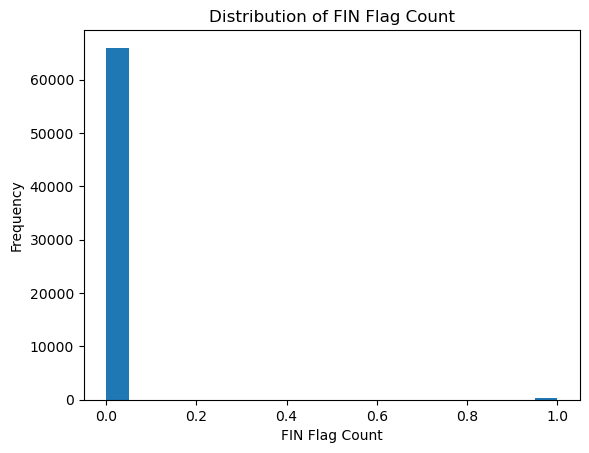

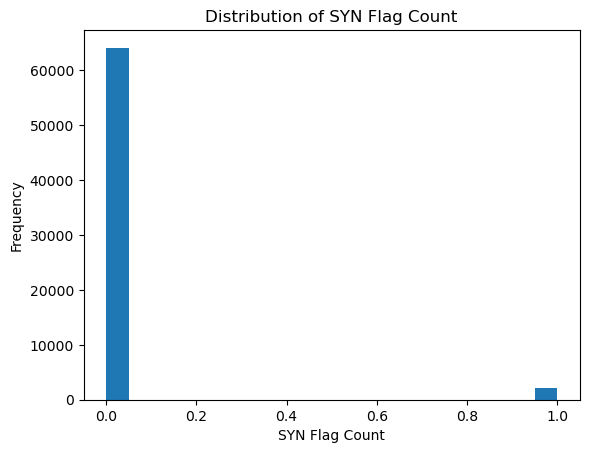

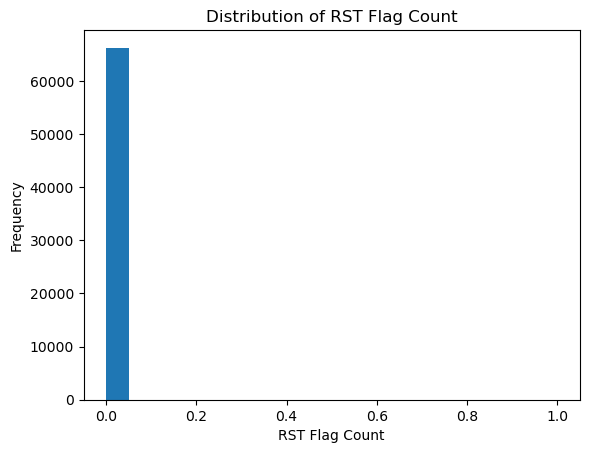

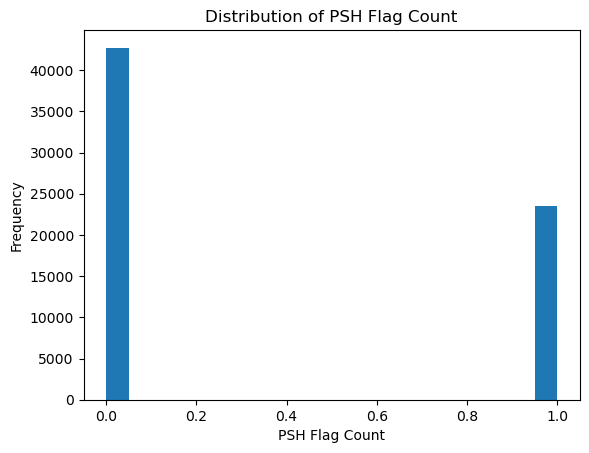

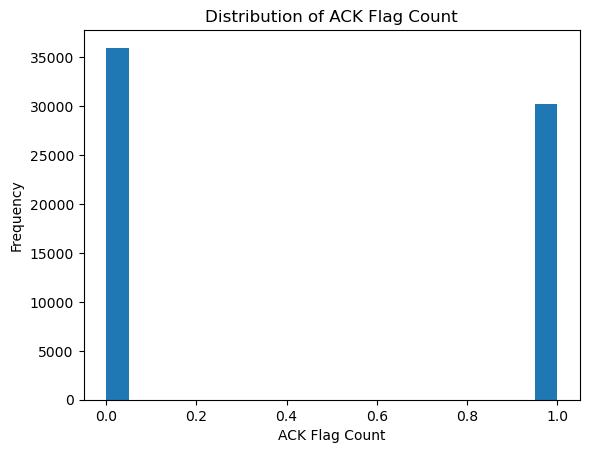

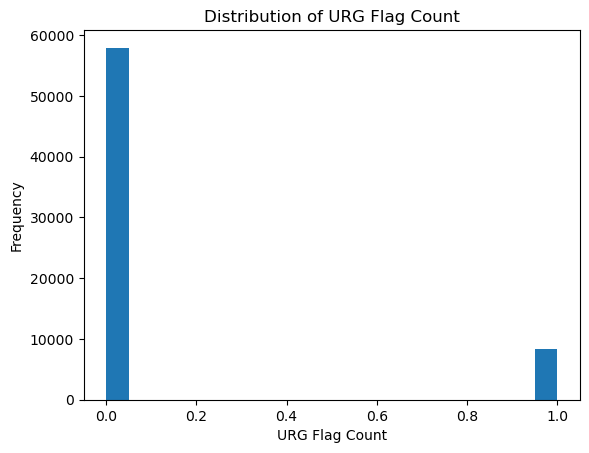

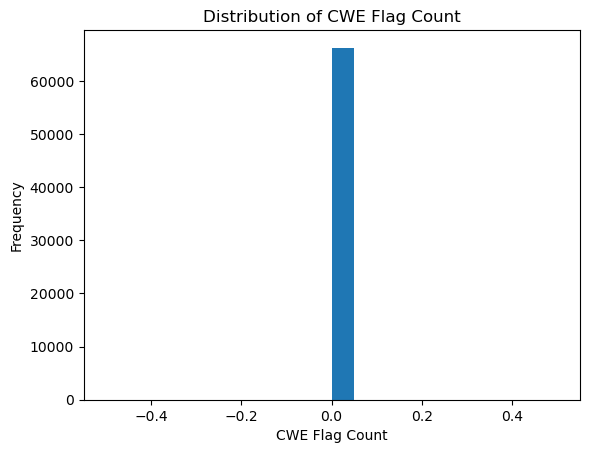

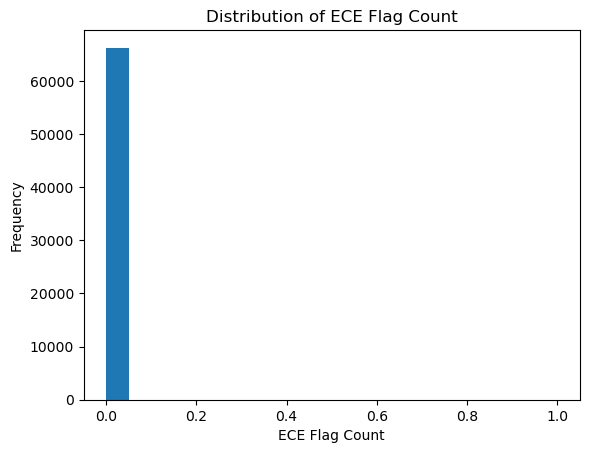

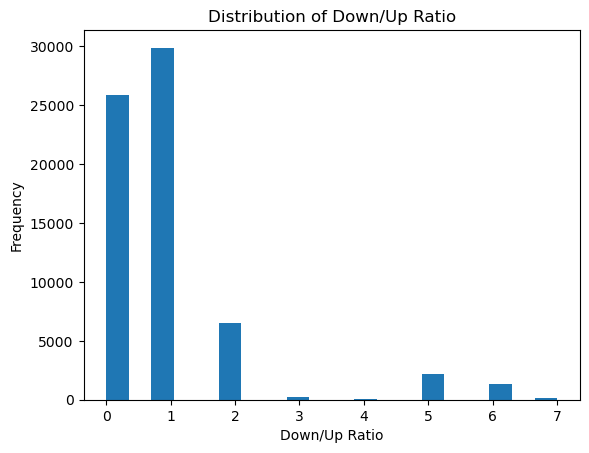

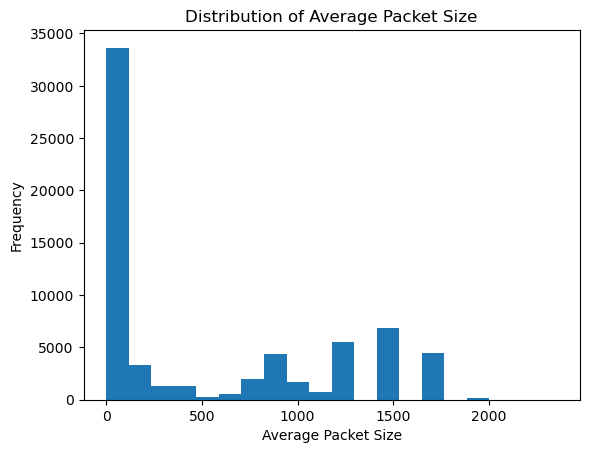

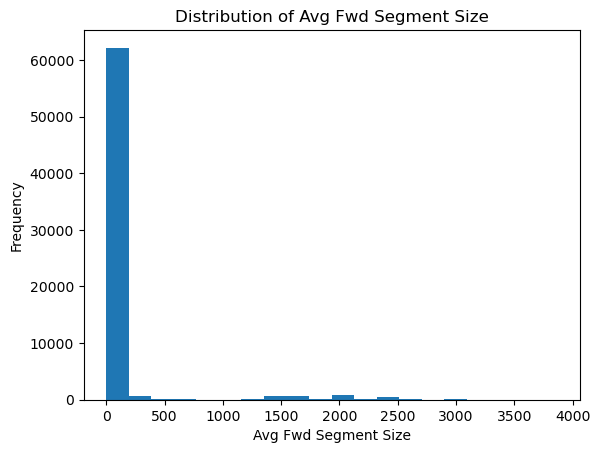

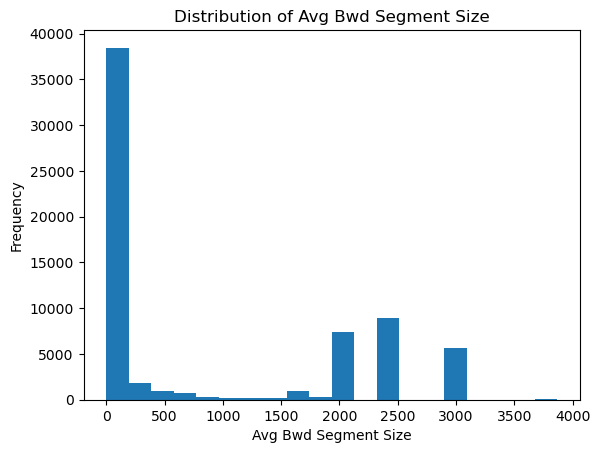

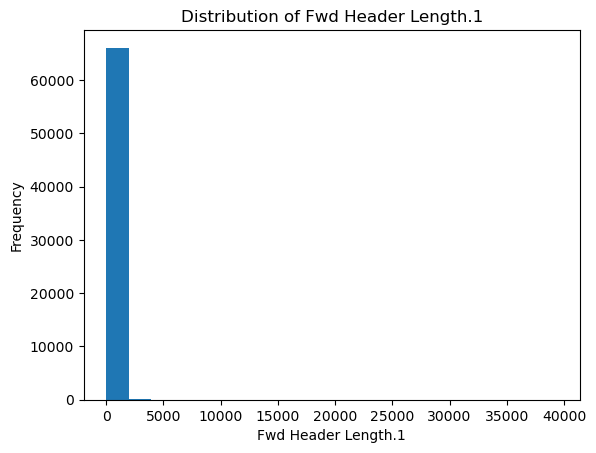

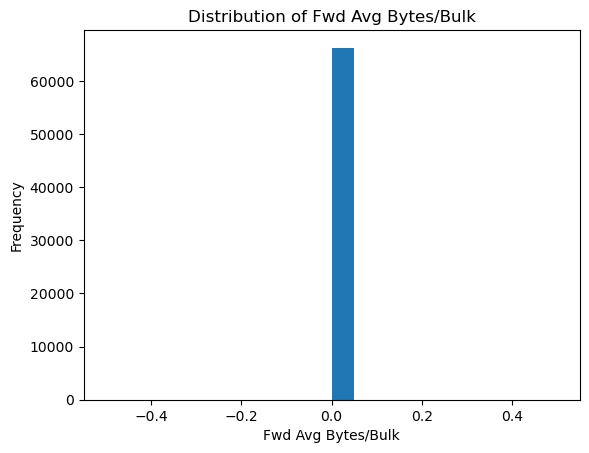

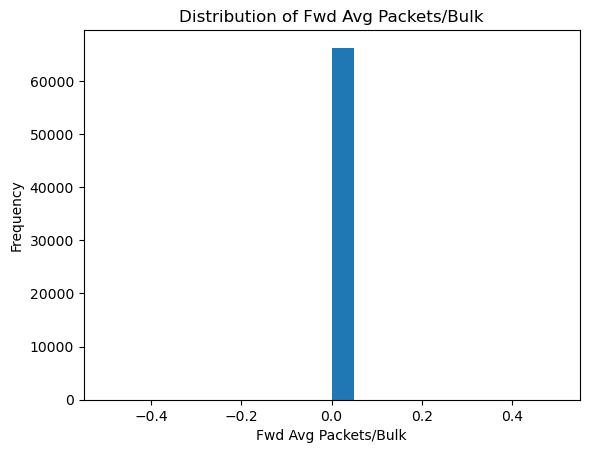

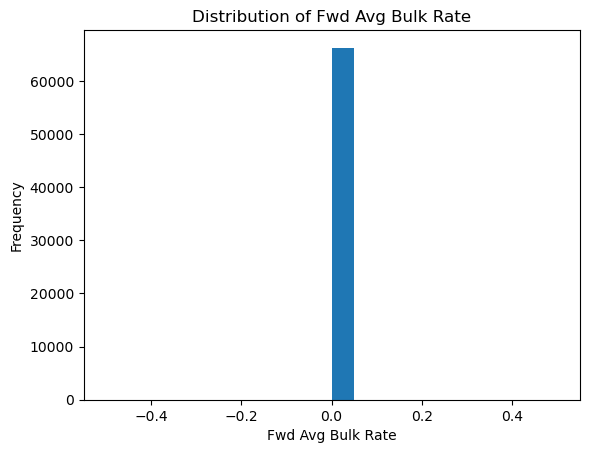

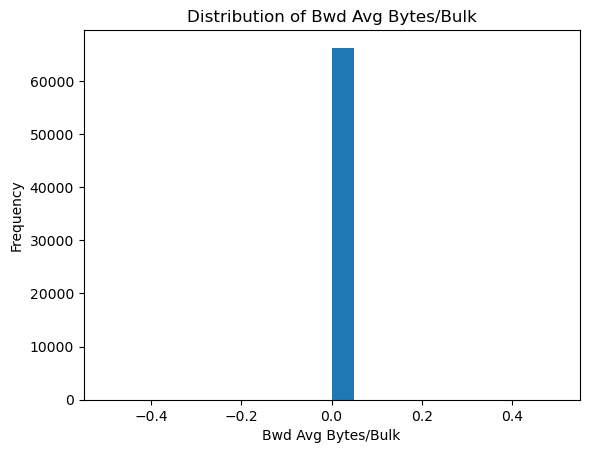

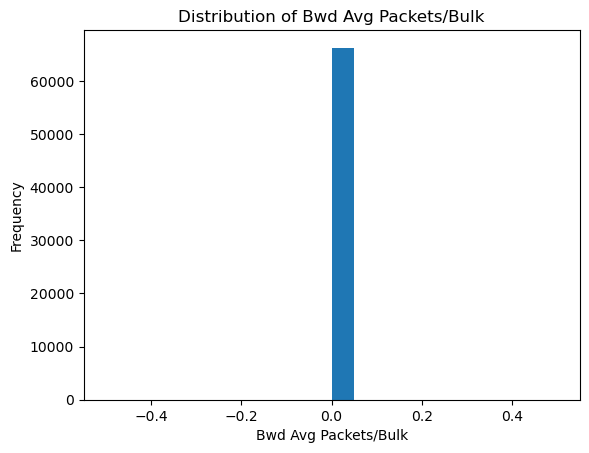

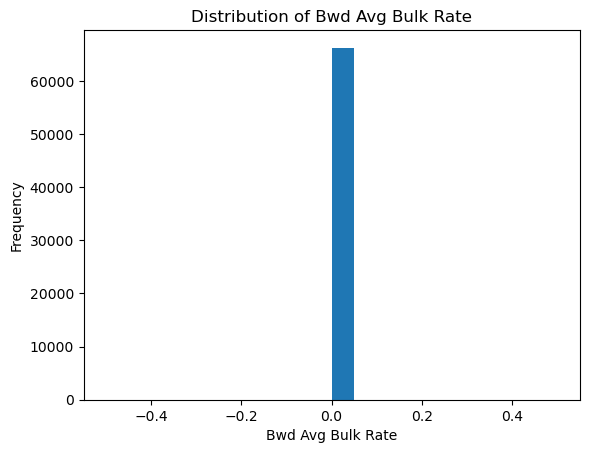

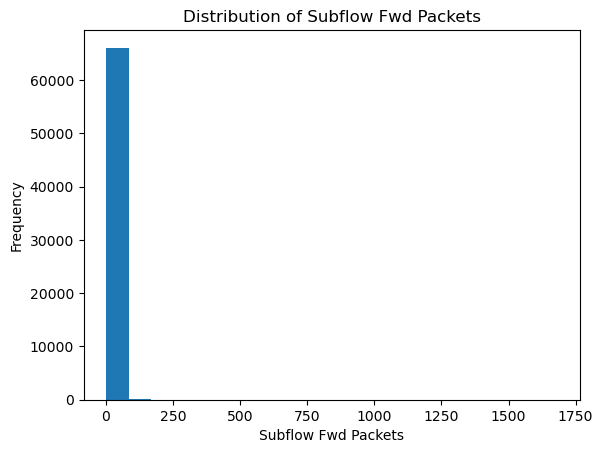

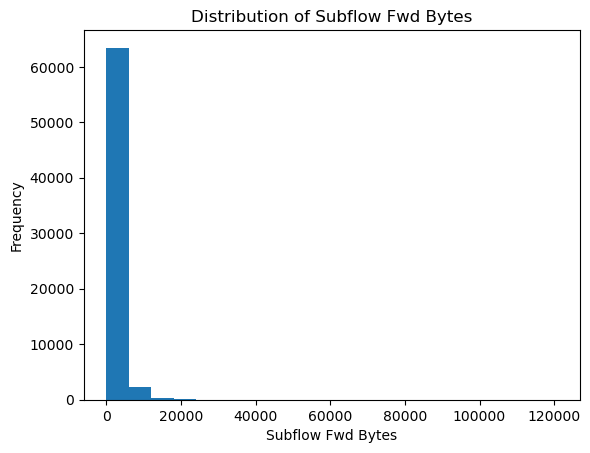

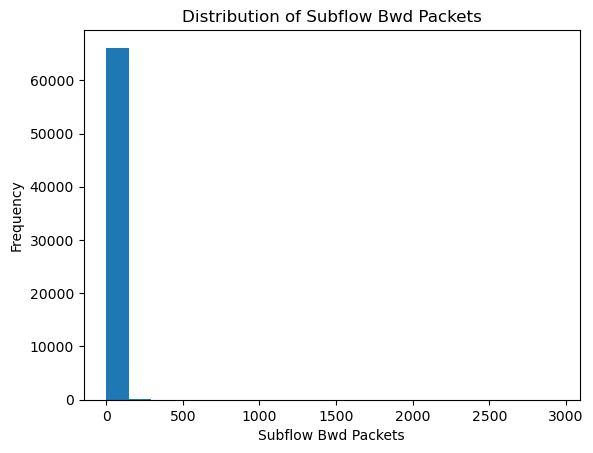

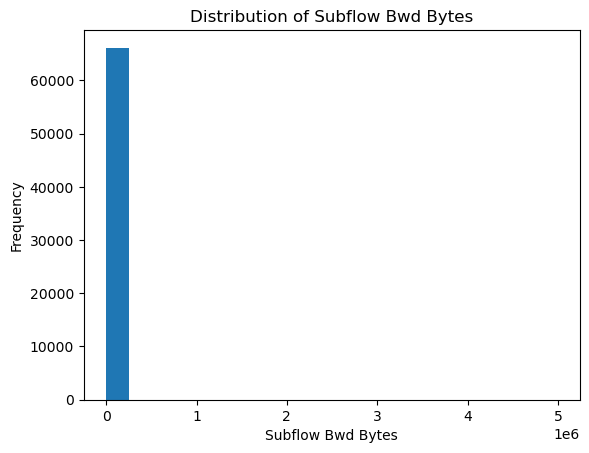

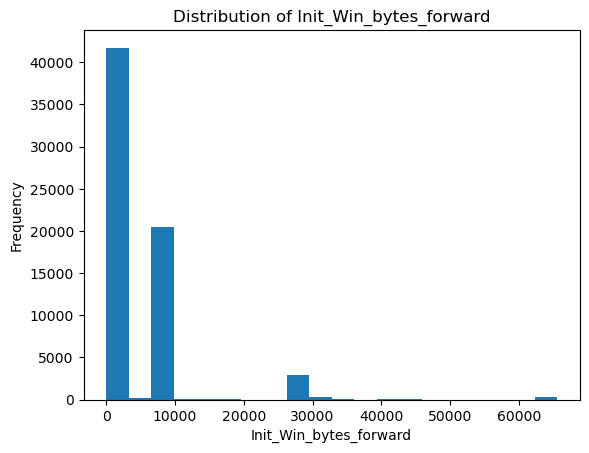

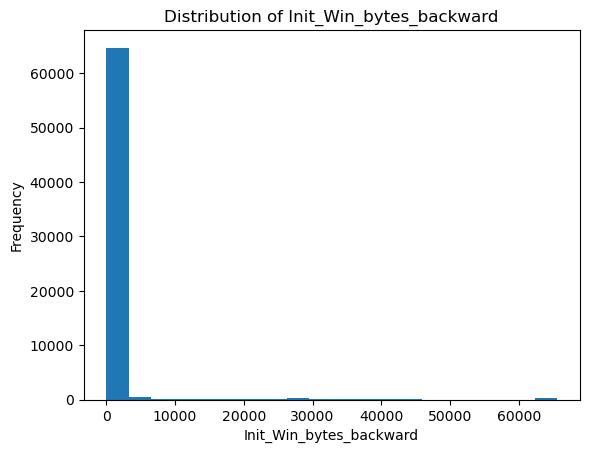

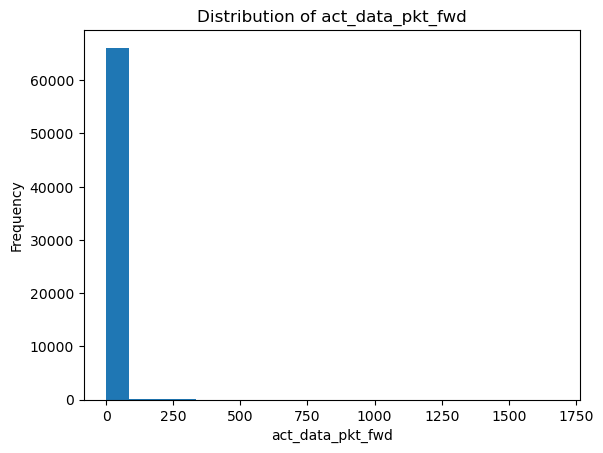

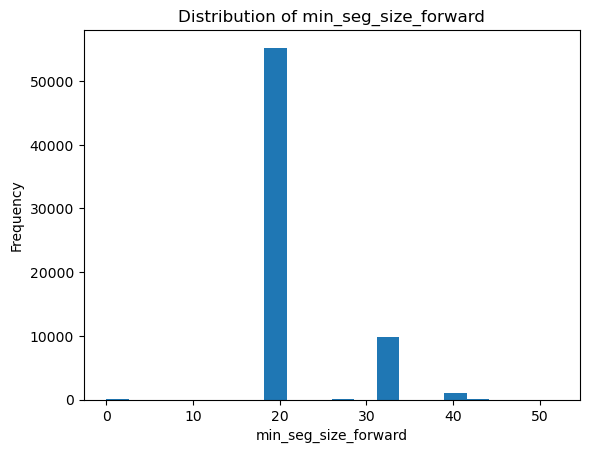

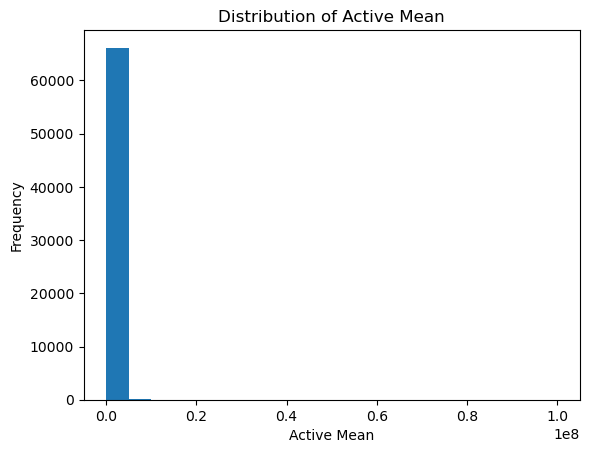

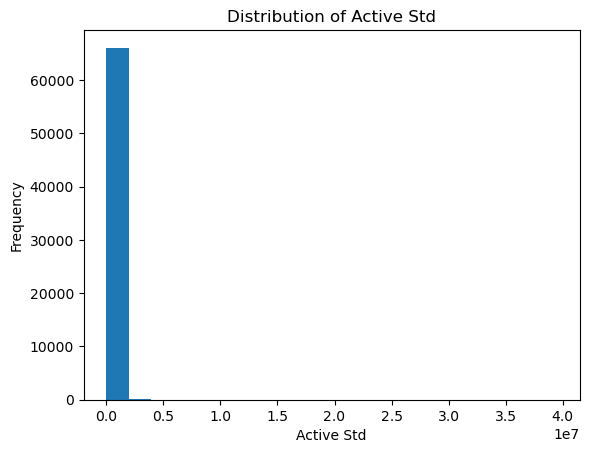

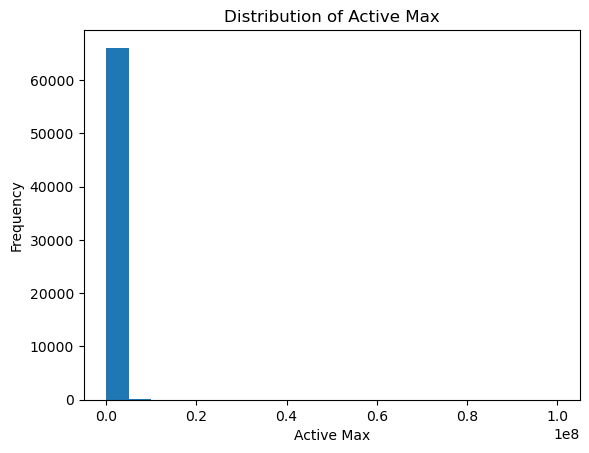

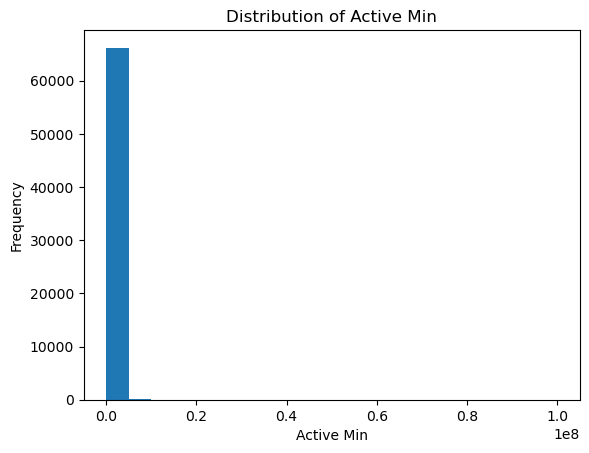

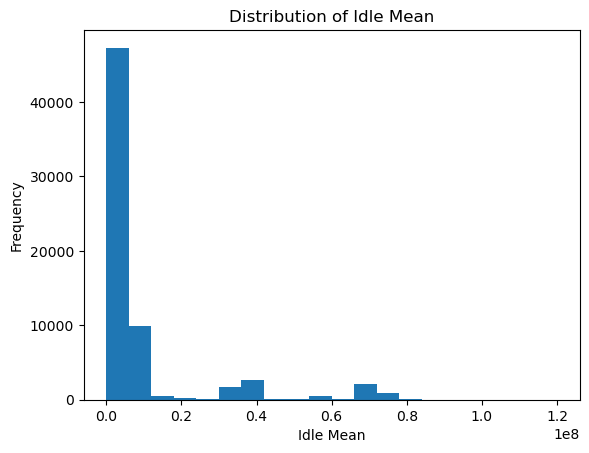

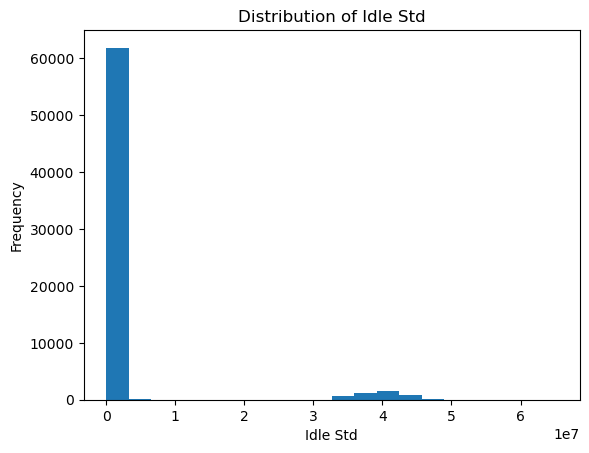

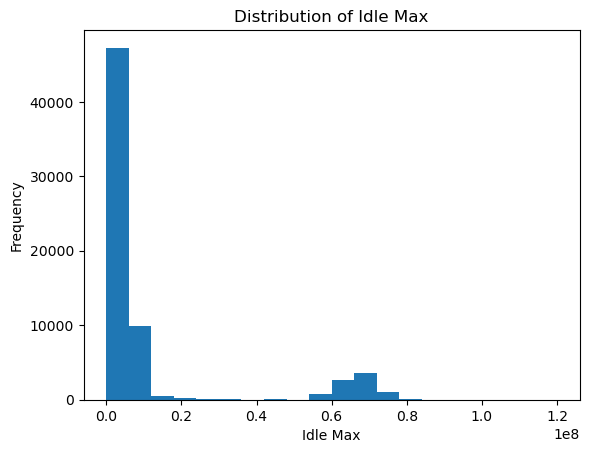

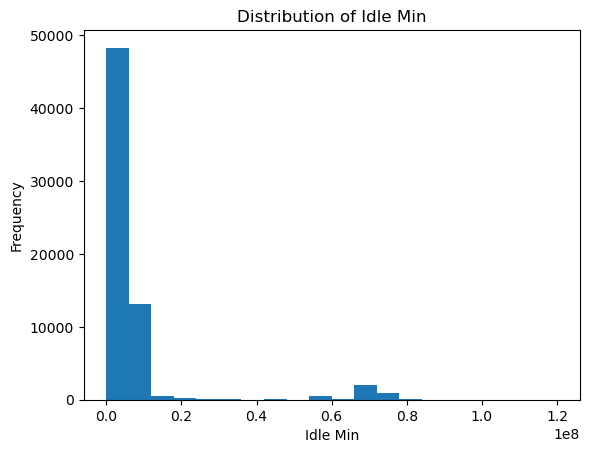

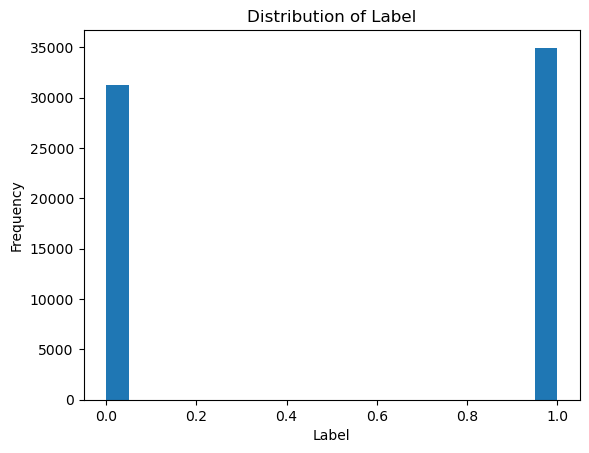

In [28]:
for column in clean_data.columns:
    plt.figure()
    plt.hist(clean_data[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Data Splitting

# Splitting data into features and target variable

In [31]:
X = clean_data.drop('Label', axis=1)
y = clean_data['Label']

# Split into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

# Random Forest Model

In [36]:
forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

# Logistic Regression Model


In [38]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

C:\Users\gandh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Gradient Boosting Model

In [40]:
gbc_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Naive Bayes Model

In [42]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

# Model Evaluation Functions

# Function to calculate and display model metrics 

# Plot confusion matrix

In [45]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


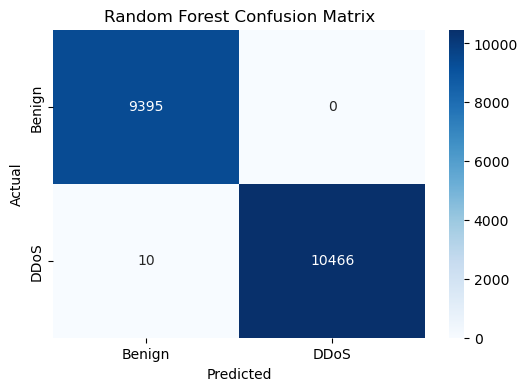


Logistic Regression Metrics:
Accuracy: 0.9439
F1 Score: 0.9492
Precision: 0.9086
Recall: 0.9936


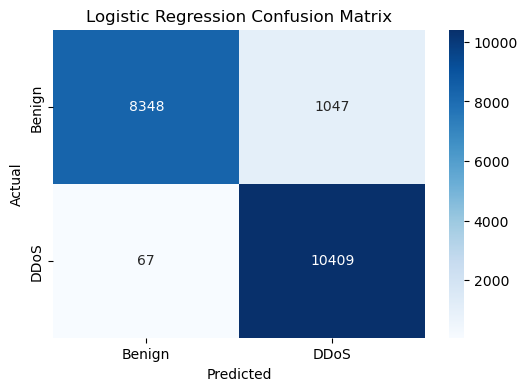


Gradient Boosting Metrics:
Accuracy: 0.9995
F1 Score: 0.9996
Precision: 1.0000
Recall: 0.9991


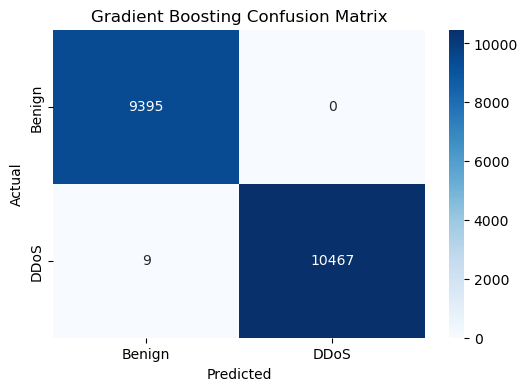


Naive Bayes Metrics:
Accuracy: 0.7551
F1 Score: 0.8114
Precision: 0.6830
Recall: 0.9991


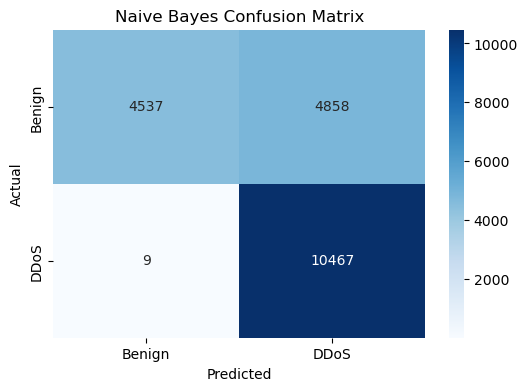

In [47]:
evaluate_model('Random Forest', forest_model, X_test, y_test)
evaluate_model('Logistic Regression', logistic_model, X_test, y_test)
evaluate_model('Gradient Boosting', gbc_model, X_test, y_test)
evaluate_model('Naive Bayes', nb_model, X_test, y_test)

# Model Comparison

# Prepare model metrics comparison

In [50]:
comparison_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, m.predict(X_test)) for m in [forest_model, logistic_model, gbc_model, nb_model]],
    'F1 Score': [f1_score(y_test, m.predict(X_test)) for m in [forest_model, logistic_model, gbc_model, nb_model]],
    'Precision': [precision_score(y_test, m.predict(X_test)) for m in [forest_model, logistic_model, gbc_model, nb_model]],
    'Recall': [recall_score(y_test, m.predict(X_test)) for m in [forest_model, logistic_model, gbc_model, nb_model]]
}

comparison_df = pd.DataFrame(comparison_data)


# Plot model comparison

<Figure size 1200x600 with 0 Axes>

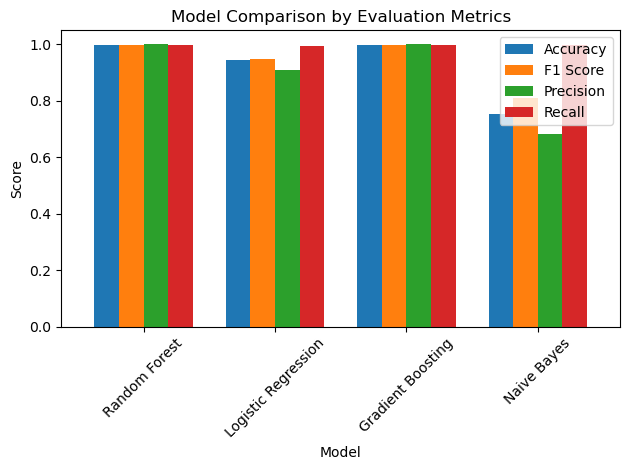

In [52]:
plt.figure(figsize=(12, 6))
comparison_df.set_index('Model').plot(kind='bar', width=0.75)
plt.title("Model Comparison by Evaluation Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ROC Curves for Each Model

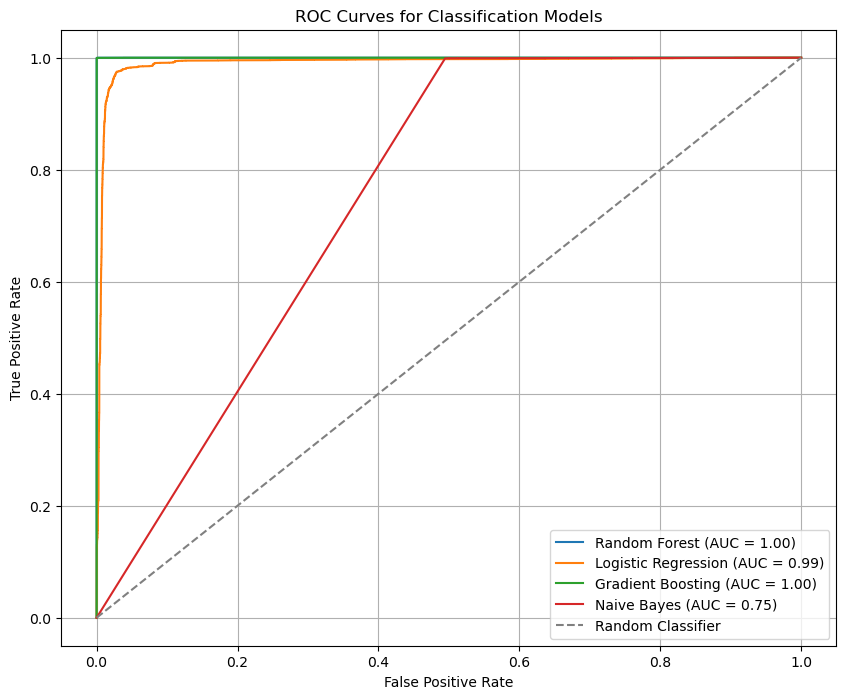

In [54]:
plt.figure(figsize=(10, 8))
for model, name in zip([forest_model, logistic_model, gbc_model, nb_model], 
                       ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Naive Bayes']):
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classification Models")
plt.legend()
plt.grid(True)
plt.show()